In [51]:
import sys
sys.executable

'/opt/anaconda3/bin/python'

In [52]:
!pip install yfinance #download real market data

In [53]:
import sys
print(sys.executable)  # should show /opt/anaconda3/bin/python
!{sys.executable} -m pip install yfinance

/opt/anaconda3/bin/python


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

#import numpy as np #math and random numbers
#import pandas as pd #pricing and returns on data tables
#import matplotlib.pyplot as plt #plotting graphs
#from scipy.stats import norm #norm dist. (black-scholes)

In [55]:
plt.rcParams["figure.figsize"] = (10, 5)
#increase plot size

In [56]:
ticker = "HYG" #chosen ETF to work with
data = yf.download(ticker, start="2015-01-01", auto_adjust=True)
#pulling real time data off yahoo finance, starting from 2015, providing 10yr data of daily prices
#auto_adjust=True means the prices are adjusted for dividends/splits
data = data[["Close"]].rename(columns={"Close": "Price"})
#keeping only closing data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Price
Ticker,HYG
Date,
2015-01-02,50.502327
2015-01-05,50.034470
2015-01-06,49.842819
2015-01-07,50.152832
2015-01-08,50.530479


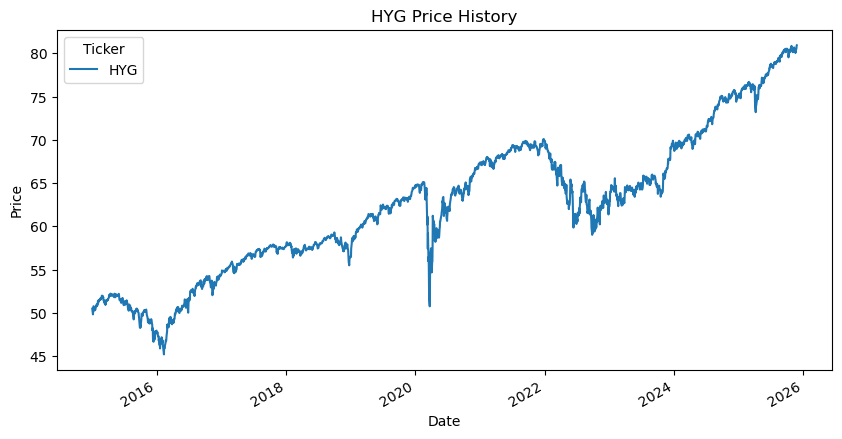

In [57]:
data["Price"].plot()
plt.title("HYG Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [58]:
# Compute daily log returns: log(P_t / P_{t-1})
data["log_ret"] = np.log(data["Price"] / data["Price"].shift(1))

# Drop the first day (it has no previous price)
returns = data["log_ret"].dropna()

returns.head()

#data["Price"].shift(1) → shifts the price series down by 1, so each row lines up with yesterday’s price.
#np.log(data["Price"] / data["Price"].shift(1)) → computes the log return for each day
#.dropna() → removes the first entry, which doesn’t have a return (no previous price)
#returns.head() → shows the first few log returns so we can check it worked

Date
2015-01-05   -0.009307
2015-01-06   -0.003838
2015-01-07    0.006201
2015-01-08    0.007502
2015-01-09    0.005007
Name: log_ret, dtype: float64

Daily log return of an asset.

Measuring the percentage change in price from yesterday to today, but expressed using a natural logarithm instead of a simple percent change.

The daily log return is:
$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

In [59]:
#The daily log return measures how much the ETF's price changes from one day to the next. 
#It is computed as the natural logarithm of today's price divided by yesterday’s price: